In [101]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np

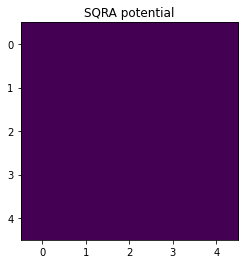

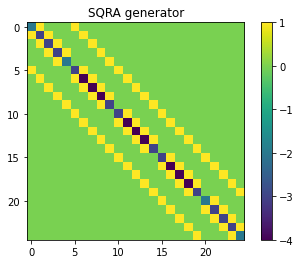

In [102]:
nx = 5
ny = 5


U = np.zeros((ny,nx))
s = sqra.sqra2d(U)
s.plot()

In [103]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptimNonaut(s, ts, penalty = 0.001)

CPU times: user 42.2 s, sys: 551 ms, total: 42.7 s
Wall time: 44.4 s


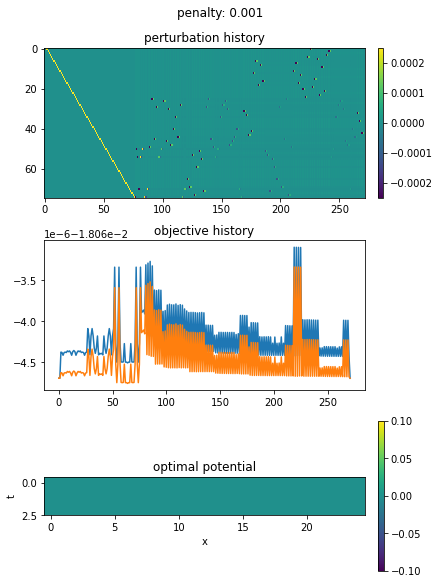

In [4]:
%time o.optimize(100)
o.plot()

In [5]:
o.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

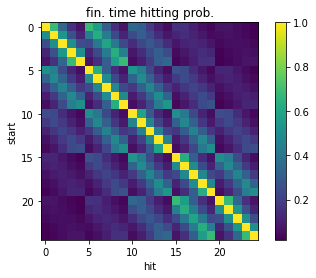

In [6]:
o.plot_fin_hit_prob()

## Result
As expected, no perturbation is necessary for optimal coverage

# Potential Barrier

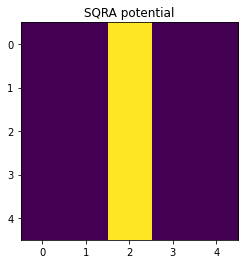

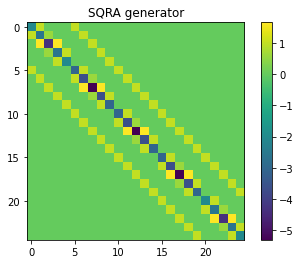

In [7]:
U_p = U.copy()
U_p[:,2] = 1
s_p = sqra.sqra2d(U_p)
s_p.plot()

In [8]:
o_p=optim.SqraOptimNonaut(s_p, ts, penalty = 0.001)

In [9]:
%time o_p.optimize(100)

CPU times: user 38.4 s, sys: 323 ms, total: 38.7 s
Wall time: 39.3 s


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.07949603e-06,  2.07949603e-06,  2.07949603e-06, ...,
         2.07949603e-06,  2.07949603e-06, -3.02779793e-07],
       [ 3.00106710e-06,  3.00106710e-06,  3.00106710e-06, ...,
         3.00106710e-06,  3.00106710e-06, -5.42884827e-07],
       [ 2.99796110e-06,  2.99796110e-06,  2.99796110e-06, ...,
         2.99796110e-06,  2.99796110e-06, -5.46697774e-07]]), array([-0.01641699, -0.0164168 , -0.0164168 , -0.0164168 , -0.0164168 ,
       -0.0164168 , -0.0164168 , -0.01641679, -0.01641679, -0.01641673,
       -0.01641672, -0.01641672, -0.01641672, -0.01641672, -0.01641672,
       -0

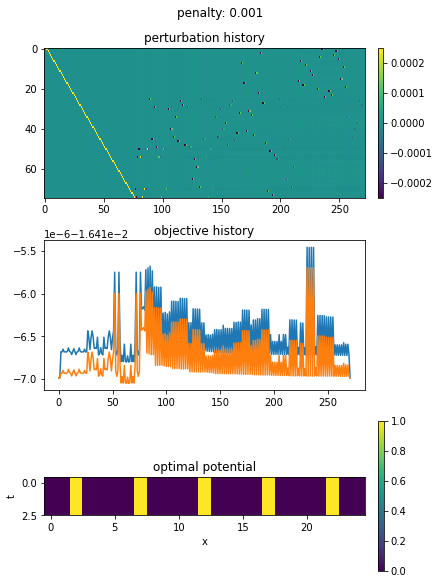

In [10]:
o_p.plot()

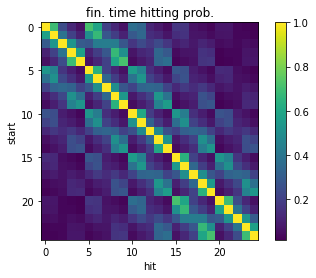

In [11]:
o_p.plot_fin_hit_prob()


# Entropic Barrier

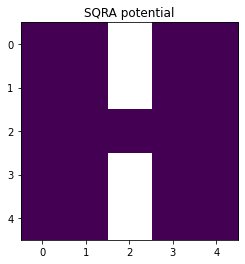

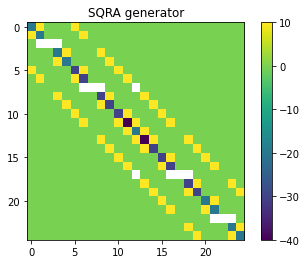

In [136]:
U_h = U.copy()
U_h[:,2] = np.inf
U_h[2,2] = 0
s_h = sqra.sqra2d(U_h, phi=10)
s_h.plot()

In [ ]:
simplex=None

In [195]:
o_h=optim.SqraOptimNonaut(s_h, ts, penalty = 0.001, simplex = simplex)

In [305]:
%time o_h.optimize(1000);

CPU times: user 3min 27s, sys: 2.61 s, total: 3min 30s
Wall time: 3min 42s


 final_simplex: (array([[ 0.14913046, -0.02543824,  0.08068985, ...,  0.44941799,
         0.15114179, -0.01302461],
       [ 0.14898911, -0.02593738,  0.08167051, ...,  0.44759452,
         0.15120406, -0.01326156],
       [ 0.14901712, -0.02565325,  0.081002  , ...,  0.44839924,
         0.15110302, -0.01312699],
       ...,
       [ 0.14873483, -0.02581318,  0.08213539, ...,  0.44651668,
         0.15085373, -0.01319389],
       [ 0.14890882, -0.02596841,  0.08190394, ...,  0.44707137,
         0.15112422, -0.01328123],
       [ 0.14920645, -0.0260368 ,  0.08125997, ...,  0.44853711,
         0.15148452, -0.01329009]]), array([-0.4168885 , -0.41688832, -0.41688832, -0.41688778, -0.41688755,
       -0.41688753, -0.41688753, -0.4168874 , -0.41688739, -0.41688731,
       -0.41688724, -0.41688723, -0.41688723, -0.41688722, -0.41688721,
       -0.41688721, -0.41688718, -0.41688714, -0.41688711, -0.41688709,
       -0.41688705, -0.41688704, -0.41688701, -0.41688688, -0.41688688,
       -0

In [304]:
simplex = None

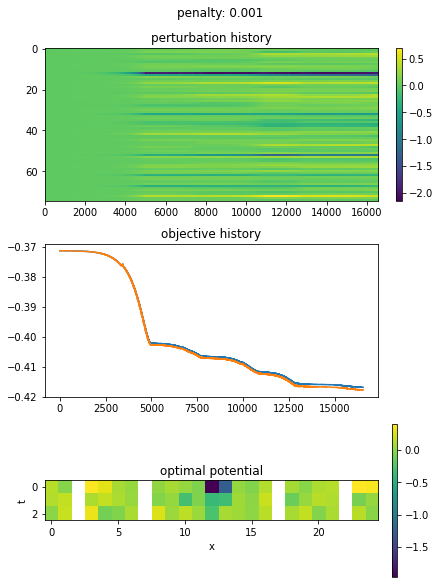

In [302]:
o_h.plot()

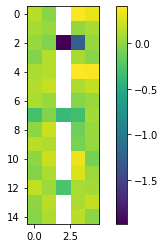

In [316]:
plt.imshow(np.vstack([x for x in o_h.x.reshape(3,5,5) + o_h.sqra.u.reshape(5,5)]))
plt.colorbar()

In [303]:
idx = (np.reshape(o_h.x, (3,25)) + o_h.sqra.u.flatten() == np.inf).flatten()
np.abs(o_h.x[idx]).sum() * o_h.penalty

0.003825123570869062

In [ ]:
np.abs(o_h.x).sum() * o_h.penalty

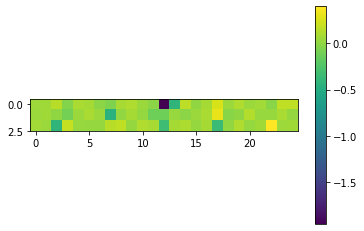

In [267]:
plt.imshow(o_h.x.reshape((nt, ny* nx)))
plt.colorbar()

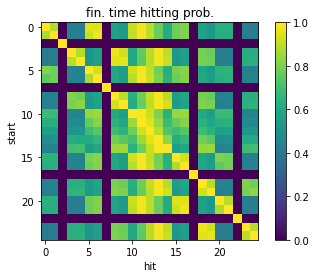

In [183]:
o_h.plot_fin_hit_prob()

In [191]:
hp = o_h.j.finite_time_hitting_probs()
hp = hp[hp > 0]
min(hp)

0.4181303535959292

In [126]:
o_h.scatter()

In [127]:
o_h.x

array([ 1.09926444e-01,  2.03877729e-01,  6.56233227e-03,  1.28145218e-01,
        1.13498127e-01,  5.33691624e-02,  1.03470501e-01, -2.55098306e-01,
        1.80800076e-01,  8.26630362e-02,  9.44624765e-02, -6.11867025e-01,
       -1.94871711e+00,  3.99891993e-01,  1.08258467e-01,  1.19589910e-01,
        4.54375530e-02, -7.68084581e-02,  2.27640304e-01,  2.06628915e-01,
        1.37129537e-01,  5.00960191e-02,  7.01918559e-01,  1.00017453e-01,
        8.17044562e-02,  8.19578342e-02,  9.69400975e-02, -2.38368174e-01,
        1.12719258e-01,  4.91671828e-02,  2.02432963e-02, -1.04839604e-02,
       -1.01846681e-01,  9.99428138e-02,  1.05176700e-01,  2.45450016e-02,
       -1.01890016e-01, -4.13343187e-01, -1.90198399e-01,  6.22810208e-02,
        1.72394935e-01,  9.23844465e-02, -1.01279023e-02,  9.96141479e-02,
        8.94046559e-02,  9.80315045e-02,  2.28533959e-01, -1.48644571e-02,
        1.42360230e-01,  5.14165626e-02,  2.61497413e-02,  2.84394999e-01,
       -7.94960220e-02,  

In [149]:
import plotly.graph_objects as go
xx = o_h.x.reshape((nt, ny, nx))
go.Figure(data = [go.Surface(z = xx[i,:,:] + 2 * i) for i in range(nt)])

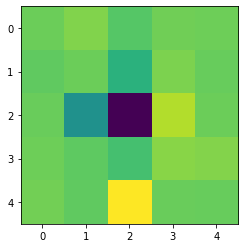

In [151]:
plt.imshow(xx[0,:,:])

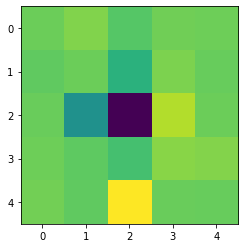

In [162]:
xts = np.reshape(o_h.x, (nt, nx*ny))
plt.imshow(np.reshape(xts[0,:], (ny, nx)))

In [173]:
xts[0,:]

array([ 0.10992644,  0.20387773,  0.00656233,  0.12814522,  0.11349813,
        0.05336916,  0.1034705 , -0.25509831,  0.18080008,  0.08266304,
        0.09446248, -0.61186702, -1.94871711,  0.39989199,  0.10825847,
        0.11958991,  0.04543755, -0.07680846,  0.2276403 ,  0.20662892,
        0.13712954,  0.05009602,  0.70191856,  0.10001745,  0.08170446])

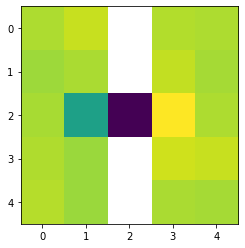

In [177]:
plt.imshow(np.reshape(xts[0,:] + o_h.sqra.u.flatten(), (5,5)))